In [2]:
!pip install sunpy[all] lime

from IPython.display import clear_output
clear_output()

In [3]:
import numpy as np
import pandas as pd

In [7]:
positive = pd.read_csv('/workspaces/flare-cme-association/2016/positive2016.csv')
positive["CME"] = 1
negative = pd.read_csv('/workspaces/flare-cme-association/2016/negative2016.csv')
negative["CME"] = 0

In [8]:
data = pd.concat([positive, negative], ignore_index=True)

In [9]:
data

,HARPNUM,NOAA,Class,Time,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,...,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,377,11158,X2.2,2011.02.14_01:56_TAI,2.292720e+22,103.723,0.019589,14129.660,56.345,3015.888,...,111.241,0.106767,5.414410e+13,1.196890e+13,7.140570e+23,51.393,945.314636,4.805,745.381,1
1,401,11166,M2.0,2011.03.06_14:30_TAI,2.352850e+22,90.899,-0.001738,9597.931,45.475,1744.633,...,95.061,0.132527,3.944860e+13,5.053110e+12,4.864570e+23,44.730,961.502686,4.303,66.343,1
2,393,11164,M3.7,2011.03.06_20:12_TAI,6.354890e+22,89.238,0.006680,8901.316,28.829,4435.788,...,97.150,-0.078173,8.578740e+13,3.416150e+13,1.096930e+24,36.080,1934.446167,4.842,619.857,1
3,637,11226,M2.5,2011.06.06_06:41_TAI,2.652940e+22,104.938,0.007635,3160.181,14.941,1671.507,...,105.271,0.019029,3.907190e+13,1.933770e+13,2.001690e+23,29.753,970.551636,3.967,364.119,1
4,750,11261,M6.0,2011.08.02_13:48_TAI,2.172090e+22,105.247,0.026394,9839.566,42.920,2712.405,...,108.889,0.296319,5.146750e+13,4.453950e+13,5.369130e+23,43.722,1259.099854,4.777,1084.488,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,5526,12335,M2.6,2015.05.04_17:24_TAI,2.524560e+22,105.354,0.005802,8447.712,40.166,2233.840,...,109.442,0.124192,4.679000e+13,9.587700e+12,4.509790e+23,42.409,1263.797485,4.498,233.215,0
416,5637,12360,M1.3,2015.06.12_07:29_TAI,5.699740e+22,82.488,0.001285,3897.788,12.100,2835.275,...,87.984,-0.031624,5.653860e+13,1.703520e+12,4.489940e+23,26.183,1631.551880,4.462,111.481,0
417,5692,12371,M1.0,2015.06.19_06:48_TAI,5.030320e+22,84.406,-0.010059,18649.460,51.975,3790.262,...,95.842,-0.135981,6.695200e+13,2.357470e+13,1.586150e+24,47.933,1852.075806,4.995,644.160,0
418,5673,12367,M3.8,2015.06.20_09:44_TAI,4.341200e+22,109.424,0.005738,5334.497,18.022,2990.720,...,114.836,-0.025103,5.857440e+13,2.133460e+13,4.428560e+23,31.039,1728.649536,4.532,358.677,0


## Plotting histograms to see the variability of the data

In [10]:
data = data.drop(['HARPNUM','NOAA','Class','Time'], axis=1)

In [11]:
X = data.drop(columns=['CME'])
y = data['CME']

In [12]:
from sklearn.preprocessing import MinMaxScaler

def normalize_the_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

xn = normalize_the_data(X)

In [13]:
columns = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
       'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH','CME']

df = pd.concat([pd.DataFrame(xn), pd.DataFrame(y)], axis=1)
df.columns = columns

df

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,0.112024,0.531635,0.616295,0.547808,0.895461,0.206969,0.749394,0.633453,0.969860,0.508987,0.502129,0.221385,0.116161,0.133936,0.929254,0.128267,0.875866,0.253499,1
1,0.115102,0.384569,0.422748,0.361563,0.720694,0.116477,0.450872,0.387820,0.749101,0.334326,0.512014,0.159923,0.045382,0.090730,0.746405,0.130544,0.784360,0.021602,1
2,0.319967,0.365520,0.499147,0.332933,0.453060,0.308043,0.344661,0.490707,0.483082,0.356877,0.431161,0.353728,0.343287,0.206617,0.509029,0.267394,0.882610,0.210632,1
3,0.130464,0.545568,0.507811,0.096983,0.229770,0.111271,0.309826,0.568525,0.330715,0.444542,0.468461,0.158348,0.191575,0.036384,0.335401,0.131817,0.723113,0.123295,1
4,0.105849,0.549112,0.678053,0.371493,0.679615,0.185366,0.654935,0.832095,0.787559,0.483597,0.574866,0.210191,0.449499,0.100309,0.718743,0.172403,0.870762,0.369307,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.123892,0.550339,0.491176,0.314291,0.635336,0.151300,0.605134,0.486420,0.697037,0.489567,0.508815,0.190628,0.091791,0.083996,0.682711,0.173064,0.819905,0.078590,0
416,0.286429,0.288111,0.450190,0.127298,0.184092,0.194112,0.188126,0.430642,0.237806,0.257931,0.449024,0.231400,0.011102,0.083619,0.237431,0.224790,0.813343,0.037017,0
417,0.252162,0.310107,0.347243,0.733563,0.825201,0.262092,0.480145,0.328756,0.797828,0.342757,0.408979,0.274952,0.234938,0.299486,0.834303,0.255808,0.910499,0.218931,0
418,0.216886,0.597014,0.490597,0.186344,0.279306,0.205178,0.413046,0.488318,0.354719,0.547794,0.451526,0.239914,0.212012,0.082454,0.370692,0.238448,0.826103,0.121437,0


In [14]:
pos = df[df['CME'] == 1]
neg = df[df['CME'] == 0]

## ANALYSIS

In [15]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

X = df.drop(columns=['CME'])
y = df['CME']

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(X)
b = np.array(y)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)

[1.24850843e-01 3.72058636e+00 6.30274599e-01 2.15730841e-01
 7.64087674e-02 8.59476439e-01 3.17468060e+00 1.47472341e+00
 3.22112918e-02 6.51767138e+00 1.02433402e-01 2.87764692e-01
 8.72522909e+00 6.60751619e-01 2.96757005e-03 1.01466922e-01
 4.29462300e-05 8.53405236e+00]


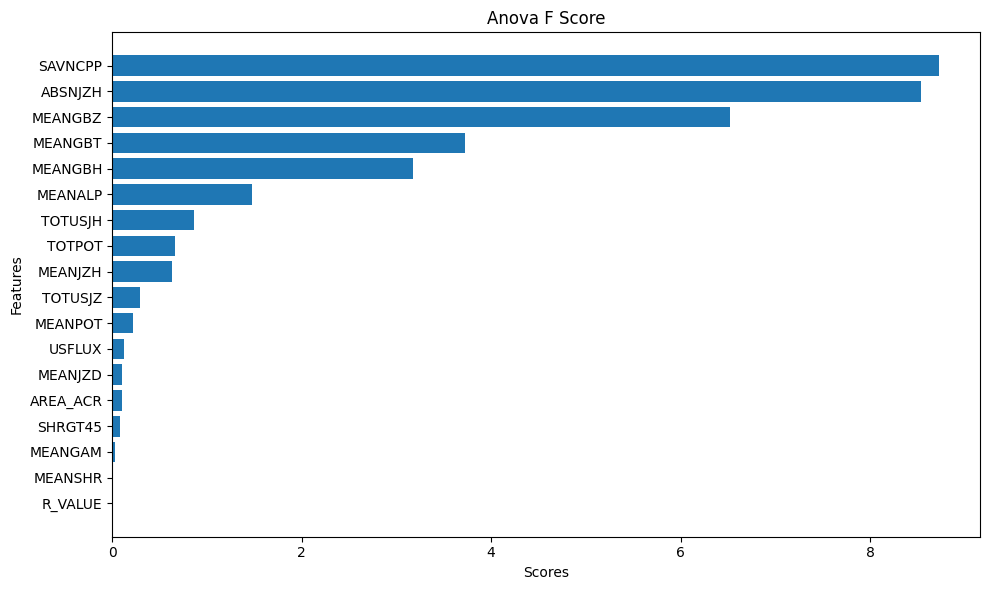

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [17]:
ordered_columns=['SAVNCPP','ABSNJZH','MEANGBZ',"MEANGBT",'MEANGBH','TOTUSJH','TOTUSJZ','TOTPOT','AREA_ACR','USFLUX','R_VALUE','SHRGT45',
                 'MEANJZD', 'MEANJZH','MEANPOT','MEANALP','MEANSHR','MEANGAM','CME']
df_reordered = df.loc[:, ordered_columns]

In [18]:
df_reordered

,SAVNCPP,ABSNJZH,MEANGBZ,MEANGBT,MEANGBH,TOTUSJH,TOTUSJZ,TOTPOT,AREA_ACR,USFLUX,R_VALUE,SHRGT45,MEANJZD,MEANJZH,MEANPOT,MEANALP,MEANSHR,MEANGAM,CME
0,0.116161,0.253499,0.508987,0.531635,0.749394,0.206969,0.221385,0.133936,0.128267,0.112024,0.875866,0.895461,0.502129,0.616295,0.547808,0.633453,0.929254,0.969860,1
1,0.045382,0.021602,0.334326,0.384569,0.450872,0.116477,0.159923,0.090730,0.130544,0.115102,0.784360,0.720694,0.512014,0.422748,0.361563,0.387820,0.746405,0.749101,1
2,0.343287,0.210632,0.356877,0.365520,0.344661,0.308043,0.353728,0.206617,0.267394,0.319967,0.882610,0.453060,0.431161,0.499147,0.332933,0.490707,0.509029,0.483082,1
3,0.191575,0.123295,0.444542,0.545568,0.309826,0.111271,0.158348,0.036384,0.131817,0.130464,0.723113,0.229770,0.468461,0.507811,0.096983,0.568525,0.335401,0.330715,1
4,0.449499,0.369307,0.483597,0.549112,0.654935,0.185366,0.210191,0.100309,0.172403,0.105849,0.870762,0.679615,0.574866,0.678053,0.371493,0.832095,0.718743,0.787559,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.091791,0.078590,0.489567,0.550339,0.605134,0.151300,0.190628,0.083996,0.173064,0.123892,0.819905,0.635336,0.508815,0.491176,0.314291,0.486420,0.682711,0.697037,0
416,0.011102,0.037017,0.257931,0.288111,0.188126,0.194112,0.231400,0.083619,0.224790,0.286429,0.813343,0.184092,0.449024,0.450190,0.127298,0.430642,0.237431,0.237806,0
417,0.234938,0.218931,0.342757,0.310107,0.480145,0.262092,0.274952,0.299486,0.255808,0.252162,0.910499,0.825201,0.408979,0.347243,0.733563,0.328756,0.834303,0.797828,0
418,0.212012,0.121437,0.547794,0.597014,0.413046,0.205178,0.239914,0.082454,0.238448,0.216886,0.826103,0.279306,0.451526,0.490597,0.186344,0.488318,0.370692,0.354719,0


In [19]:
pos = df_reordered[df_reordered['CME'] == 1]
neg = df_reordered[df_reordered['CME'] == 0]

In [20]:
min_a = pos.index.min()
max_a = pos.index.max()

pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)

min_b = neg.index.min()
max_b = neg.index.max()

neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)

/tmp/ipykernel_65120/2878712047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)
/tmp/ipykernel_65120/2878712047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)


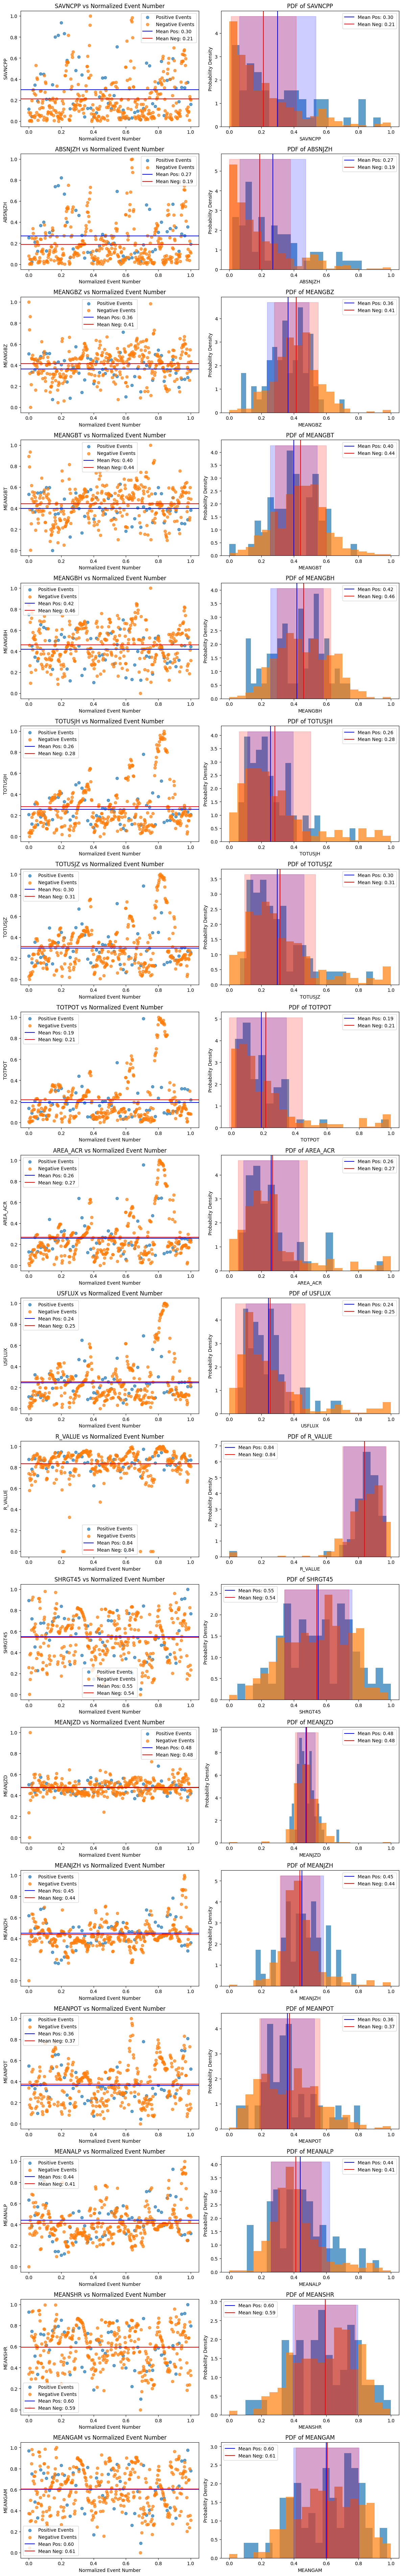

<Figure size 640x480 with 0 Axes>

In [21]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
plt.figure(figsize=(12, 80))

for i in range(len(columns) - 1):
    mean_pos = np.mean(pos.iloc[:, i])
    mean_neg = np.mean(neg.iloc[:, i])
    std_pos = np.std(pos.iloc[:,i])
    std_neg = np.std(neg.iloc[:,i])

    plt.subplot(len(columns), 2, a)
    plt.scatter(pos["normalized_event_number"], pos.iloc[:, i], alpha=0.7, label="Positive Events")
    plt.scatter(neg["normalized_event_number"], neg.iloc[:, i], alpha=0.7, label="Negative Events")
    plt.axhline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axhline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(ordered_columns[i])
    plt.title(f"{ordered_columns[i]} vs Normalized Event Number")
    plt.legend()

    plt.subplot(len(columns), 2, a + 1)
    plt.hist(pos.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.hist(neg.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.axvline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axvline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_pos - std_pos, mean_pos + std_pos, color='b', alpha=0.2)
    plt.fill_betweenx([ymin, ymax], mean_neg - std_neg, mean_neg + std_neg, color='r', alpha=0.2)
    plt.xlabel(ordered_columns[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {ordered_columns[i]}')
    plt.legend()

    a += 2

plt.tight_layout()
plt.show()
plt.savefig("2024_parameters_pdf.jpeg")